# Test plot_multi_barrier method

In [1]:
import sys
import pandas as pd
import mplfinance as mpl
from datetime import datetime

In [2]:
sys.path.append("../")
from triple_barrier.plots import PlotTripleBarrier
from triple_barrier.trade_labeling import TradeSide

from triple_barrier.trade_labeling import Labeler
from triple_barrier.orders import Orders

from tests.test_utils import dummy_strategy

import pandas as pd
import mplfinance as mpl
from datetime import datetime

## Parameters

In [3]:
TAKE_PROFIT_WIDTH = 10
STOP_LOSS_WIDTH = 5
PIP_DECIMAL_POSITION = 4
TIME_BARRIER_PERIODS = 10

In [4]:
columns = ["date-time", "open", "high", "low", "close", "volume"]
df = pd.read_csv("../tests/data/EURUSD_5 Mins_Ask_2023.01.02_2024.02.02.csv", 
                 names=columns, 
                 parse_dates=True, 
                 index_col="date-time",
                 header=0)

## Long Setup

In [5]:
price = dummy_strategy.calculate_test_features_long()
mask_entry = price["entry"] == 1
entry = price[mask_entry]

In [6]:
row_index = 6
box_setup = Orders()

box_setup.open_time = str(entry.iloc[row_index].name)
box_setup.open_price = entry.loc[box_setup.open_time]["open"]
box_setup.take_profit_width = TAKE_PROFIT_WIDTH
box_setup.stop_loss_width = STOP_LOSS_WIDTH
box_setup.time_limit = price[box_setup.open_time:].index[TIME_BARRIER_PERIODS]
box_setup.trade_side = TradeSide.BUY
box_setup.pip_decimal_position = PIP_DECIMAL_POSITION

In [7]:
barrier_builder = Labeler(open_price=price.open,
                               high_price=price.high,
                               low_price=price.low,
                               close_price=price.close,
                               dynamic_exit=price["exit"],
                               box_setup=box_setup
                               )
barrier_builder.compute()

In [8]:
plot_tb = PlotTripleBarrier(price.open,
                           price.high,
                           price.low,
                           price.close,
                           PIP_DECIMAL_POSITION,
                           periods_to_plot=30,
                           overlay_features=[ price["mva-12"], price["mva-24"] ]
                           )

Plotting barrier for 30


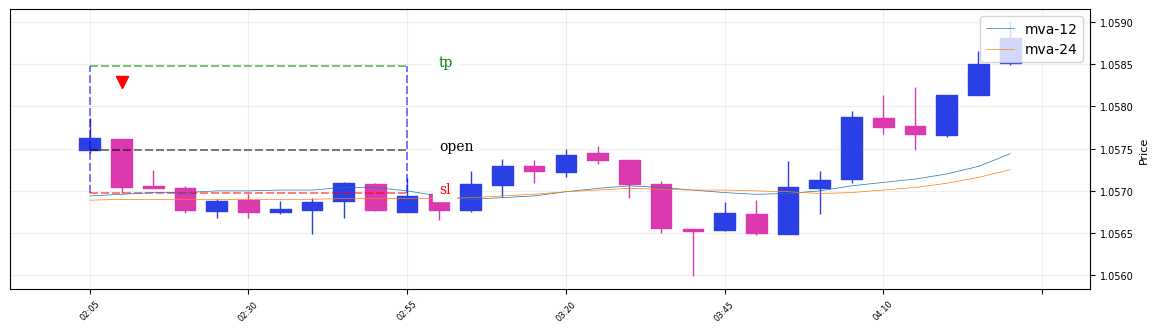

In [9]:
plot_tb.plot_multi_barrier(barrier_builder)

In [10]:
print("Hit ", barrier_builder.orders_hit.first_hit)

Hit  
        Datetime: 2023-01-04 02:10:00
        Level: 1.05698
        Type: stop-loss
        


## Short Setup

In [11]:
price = dummy_strategy.calculate_test_features_short()
mask_entry = price["entry"] == 1
entry = price[mask_entry]

In [12]:
row_index = 2
box_setup = Orders()

box_setup.open_time = str(entry.iloc[row_index].name)
box_setup.open_price = entry.loc[box_setup.open_time]["open"]
box_setup.take_profit_width = TAKE_PROFIT_WIDTH
box_setup.stop_loss_width = STOP_LOSS_WIDTH
box_setup.time_limit = price[box_setup.open_time:].index[TIME_BARRIER_PERIODS]
box_setup.trade_side = TradeSide.SELL
box_setup.pip_decimal_position = PIP_DECIMAL_POSITION

In [13]:
barrier_builder = Labeler(open_price=price.open,
                               high_price=price.high,
                               low_price=price.low,
                               close_price=price.close,
                               dynamic_exit=price["exit"],
                               box_setup=box_setup
                               )
barrier_builder.compute()

Plotting barrier for 30


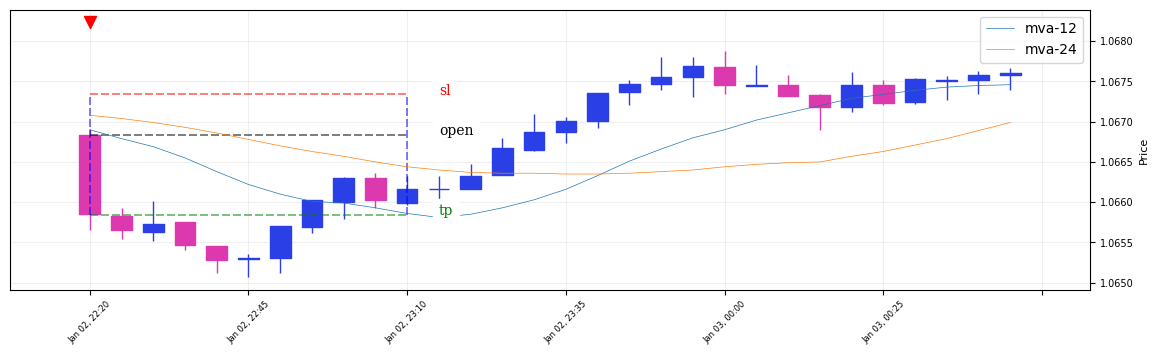

In [14]:
plot_tb.plot_multi_barrier(barrier_builder)

In [15]:
print("Hit ", barrier_builder.orders_hit.first_hit)

Hit  
        Datetime: 2023-01-02 22:20:00
        Level: 1.0658400000000001
        Type: take-profit
        
